In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
id = "1-A1WWZEo_NUOp3-uxU8in5Z1e0vw6ucn"

In [5]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_data')  

In [6]:
test_data = pd.read_pickle("test_data")

In [10]:
test_data

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,lemmatized_comment,lemmatized_parent_comment,clean_comment,clean_parent_comment,lemmatized_clean_comment,lemmatized_clean_parent_comment,vectorized_comment,vectorized_clean_comment,vectorized_parent_comment,vectorized_clean_parent_comment,dirty_cosine_similarity,clean_cosine_similarity,word_count,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count,partial_capital_word_count,emoticon_count,sentiment
794682,1,Racist comments are really rare on the interne...,Targash,news,6.0,6.0,0.0,2014-06,11/6/14 16:02,"perhaps it is your bias dear redditor, and non...",Racist comment really rare internet 's clearly...,"perhaps bias dear redditor , none .",Racist comments are really rare on the interne...,perhaps it is your bias dear redditor and none...,Racist comment really rare internet clearly re...,perhaps bias dear redditor none,"[-0.2260461, -0.5411476, -0.5956079, 1.6732603...","[-0.5515428, -0.59989977, 0.069325216, 1.59275...","[-0.24906166, -0.65218884, 0.12795807, 0.64601...","[-0.33440658, -0.508268, 0.3577558, 0.4706608,...",0.250085,0.188576,27,2,0,0,0,0,0,0,0,0,0,neg
1003517,0,"yes, if good taste is what a cock doodle shoul...",superfusion1,sex,8.0,8.0,0.0,2011-01,19/1/11 15:32,That's the most tasteful video I have ever see...,"yes , good taste cock doodle , let cock doodle .",That 's tasteful video I ever see cock doodle .,yes if good taste is what a cock doodle should...,Thats the most tasteful video I have ever seen...,yes good taste cock doodle let cock doodle,Thats tasteful video I ever see cock doodle,"[-0.7737616, 0.4774656, 0.13742262, 0.18524809...","[-0.76534796, 0.46344534, -0.03482504, -0.1605...","[-0.19669841, 0.023759527, 0.39963058, -0.1046...","[-0.32654247, 0.2684772, 0.13918118, 0.0023651...",0.249204,0.183911,18,3,0,0,0,0,0,0,0,0,0,pos
526207,1,Totally not photoshopped...,RB30DETT,funny,11.0,11.0,0.0,2015-12,11/12/15 17:29,London Underground,Totally photoshopped ...,London Underground,Totally not photoshopped,London Underground,Totally photoshopped,London Underground,"[-0.14899243, -0.19366069, -0.20084605, 0.6875...","[-0.11780262, -0.2061242, 0.010147771, 0.53536...","[0.20910913, -0.055749796, 0.017575901, 0.4827...","[0.11732921, -0.14933924, 0.042169612, 0.49933...",0.760832,0.762000,3,3,0,0,0,1,0,0,0,0,0,neu
169751,1,"No, there's too much sexism in those industrie...",randomcombination102,TumblrInAction,50.0,-1.0,-1.0,2016-12,18/12/16 2:17,"Yeah, it's much easier to bitch about male pri...","No , 's much sexism industry make dangerous wo...","Yeah , 's much easy bitch male privilege inter...",No theres too much sexism in those industries ...,Yeah its much easier to bitch about male privi...,No there much sexism industry make dangerous w...,Yeah much easy bitch male privilege internet l...,"[0.24865268, 0.7403738, 0.05449423, 0.81168157...","[0.31113982, 1.0847201, 0.07776833, 0.32138768...","[-0.6251248, -0.3786881, 0.0020529833, 1.26597...","[-0.52135706, -0.47163898, -0.053898532, 1.226...",0.222351,0.213574,18,3,0,0,0,0,0,0,0,0,0,neg
585774,0,Maybe they should take a leaf from the lending...,MemorableYetUnique,unitedkingdom,1.0,1.0,0.0,2015-10,19/10/15 20:15,It's because they specifically want to offer l...,Maybe take leaf lending industry 's playbook o...,It 's specifically want offer loss-making ( bo...,Maybe they should take a leaf from the lending...,Its because they specifically want to offer lo...,Maybe take leaf lending industry playbook offe...,Its specifically want offer lossmaking bookie ...,"[0.022282721, 0.008266672, 0.74342155, 0.85941...","[0.8069845, 0.17959124, 0.5259561, 1.3175151, ...","[-1.6010864, 1.8231604, -0.28390932, 0.6216357...","[-2.014457, 2.110243, -0.8449971, 1.1744075, 0...",0.192439,0.108372,21,9,0,0,0,1,0,0,0,1,0,neu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [11]:
id = "1mzqYHgjwStXMT30427_s1bUEoTw0d9oS"

In [12]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('base_pred')  

In [13]:
with open('base_pred', 'rb') as f:
    base_pred = np.load(f)

In [14]:
id = '1mvtViYMhoiDXUxP2blFSgMInhCRSwUcr'

In [15]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('feature_pred')  

In [16]:
with open('feature_pred', 'rb') as f:
    feature_pred = np.load(f)

In [17]:
id = '1WECoXjlaf8Uifiw5u5T3gVn92RJQI5FZ'

In [18]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('hyper_pred')  

In [19]:
with open('hyper_pred', 'rb') as f:
    hyper_pred = np.load(f)

In [20]:
test_data['base_pred'] = base_pred
test_data['feature_pred'] = feature_pred
test_data['hyper_pred'] = hyper_pred

In [21]:
len(test_data[(test_data['base_pred']==test_data['label'])])/len(test_data)

0.6141339295430488

In [22]:
len(test_data[(test_data['feature_pred']==test_data['label'])])/len(test_data)

0.6284241662791963

In [23]:
len(test_data[(test_data['hyper_pred']==test_data['label'])])/len(test_data)

0.6303186490309943

# Analysis from base pred to feature pred

In [24]:
feature_pred_improve = test_data[(test_data['base_pred']!=test_data['label']) & (test_data['feature_pred']==test_data['label'])] # 22445 predicted correctly after using features

In [25]:
feature_pred_worse = test_data[(test_data['base_pred']==test_data['label']) & (test_data['feature_pred']!=test_data['label'])]  # 19072 predicted wrongly after using features

In [26]:
feature_pred_worse

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,lemmatized_comment,lemmatized_parent_comment,clean_comment,clean_parent_comment,lemmatized_clean_comment,lemmatized_clean_parent_comment,vectorized_comment,vectorized_clean_comment,vectorized_parent_comment,vectorized_clean_parent_comment,dirty_cosine_similarity,clean_cosine_similarity,word_count,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count,partial_capital_word_count,emoticon_count,sentiment,base_pred,feature_pred,hyper_pred
23680,0,Dont worry at least you still have Westbrook A...,PrinceOfAssassins,nba,1.0,-1.0,-1.0,2016-10,28/10/16 21:10,:(,Dont worry least still Westbrook And adam real...,: (,Dont worry at least you still have Westbrook A...,,Dont worry least still Westbrook And adam real...,,"[-0.3104436, -1.5445948, 0.783962, 1.0085248, ...","[-0.24261421, -1.3911144, 0.7694766, 0.898309,...","[0.00048813503, 0.0021518937, 0.0010276338, 0....","[0.00048813503, 0.0021518937, 0.0010276338, 0....",-0.002905,0.012052,19,0,0,0,0,0,0,0,0,0,0,neg,0,1,0
863418,1,These newfangled automobiles with their engine...,michaelGregoire,vim,1.0,1.0,0.0,2014-09,13/9/14 18:39,:syntax on,These newfangled automobile engine wheel crap ...,: syntax,These newfangled automobiles with their engine...,syntax on,These newfangled automobile engine wheel crap ...,syntax,"[0.7659738, -2.0573118, 0.35538575, 1.5123426,...","[0.46817, -1.9479036, -0.062023938, 1.2619452,...","[0.27471253, -0.07106915, 0.10322713, 0.331914...","[0.2879494, -0.05786264, 0.1388747, 0.3917434,...",0.294449,0.259781,17,7,0,0,0,1,0,0,0,0,0,neg,1,0,1
793094,1,You stole my line.,AlphaWookie,MensRights,2.0,2.0,0.0,2014-07,8/7/14 16:45,As a person of color who has lived and done ex...,You steal line .,As person color live do extensive work urban i...,You stole my line,As a person of color who has lived and done ex...,You steal line,As person color live do extensive work urban i...,"[-0.25410673, -0.07048665, 0.15387908, 0.50078...","[-0.161351, -0.09229525, -0.014377081, 0.41564...","[1.0359823, -0.05522279, -0.09645308, -0.39308...","[1.036042, -0.25156623, 0.14227113, -0.2849443...",0.241253,0.181899,4,1,0,0,0,0,0,0,0,0,0,neu,1,0,0
882899,0,Tee it up high and let it fly!,princelabia,golf,4.0,4.0,0.0,2014-12,30/12/14 18:15,"Thought I ordered 4000 1"" tees, not 1 4000"" tee",Tee high let fly !,"Thought I order 4000 1 '' tee , 1 4000 '' tee",Tee it up high and let it fly,Thought I ordered 4000 1 tees not 1 4000 tee,Tee high let fly,Thought I order 4000 1 tee 1 4000 tee,"[-0.22258727, -0.0446777, 0.08137807, 0.186797...","[-0.2503659, -0.019412555, 0.15678516, 0.18947...","[-0.28619996, -0.15002584, 0.35737273, 0.50390...","[-0.21812882, -0.023922797, 0.059053745, 0.291...",0.166686,0.064634,8,1,0,1,0,0,0,0,0,0,0,neu,0,1,1
428853,1,"Hmmm, a bunch of Christians who covet other pe...",ShieldoftheWolf,ShitPoliticsSays,13.0,13.0,0.0,2015-11,2/11/15 1:07,Bernie Sanders is literally Jesus,"Hmmm , bunch Christians covet people wealth li...",Bernie Sanders literally Jesus,Hmmm a bunch of Christians who covet other peo...,Bernie Sanders is literally Jesus,Hmmm bunch Christians covet people wealth like...,Bernie Sanders literally Jesus,"[0.87790716, 0.51258373, 0.54847693, 0.3405027...","[0.8682166, 0.86812955, 0.56226087, 0.37836808...","[0.03821999, 0.17724298, 0.12805264, 0.1087225...","[-0.05823662, -0.091051586, 0.1442951, 0.33953...",0.306019,0.356434,24,4,1,0,0,1,0,0,0,0,0,pos,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426170,1,OP must be loaded if he's buying his brothers ...,Manny7000,bestoflegaladvice,10.0,10.0,0.0,2016-04,28/4/16 17:00,My deadbeat dad forged a contract saying that ...,"OP must load 's buy brother $ 71,000 car .",My deadbeat dad forge contract say I 'm respon...,OP must be loaded

In [27]:
counts =['word_count',
       'punctuation_count', 'has_repeated', 'exclaim_count', 'qns_mark_count',
       'ellipses_mark_count', 'interjection_count', 'laughter_words_count',
       'capitalized_word_count', 'partial_capital_word_count',
       'emoticon_count','dirty_cosine_similarity']

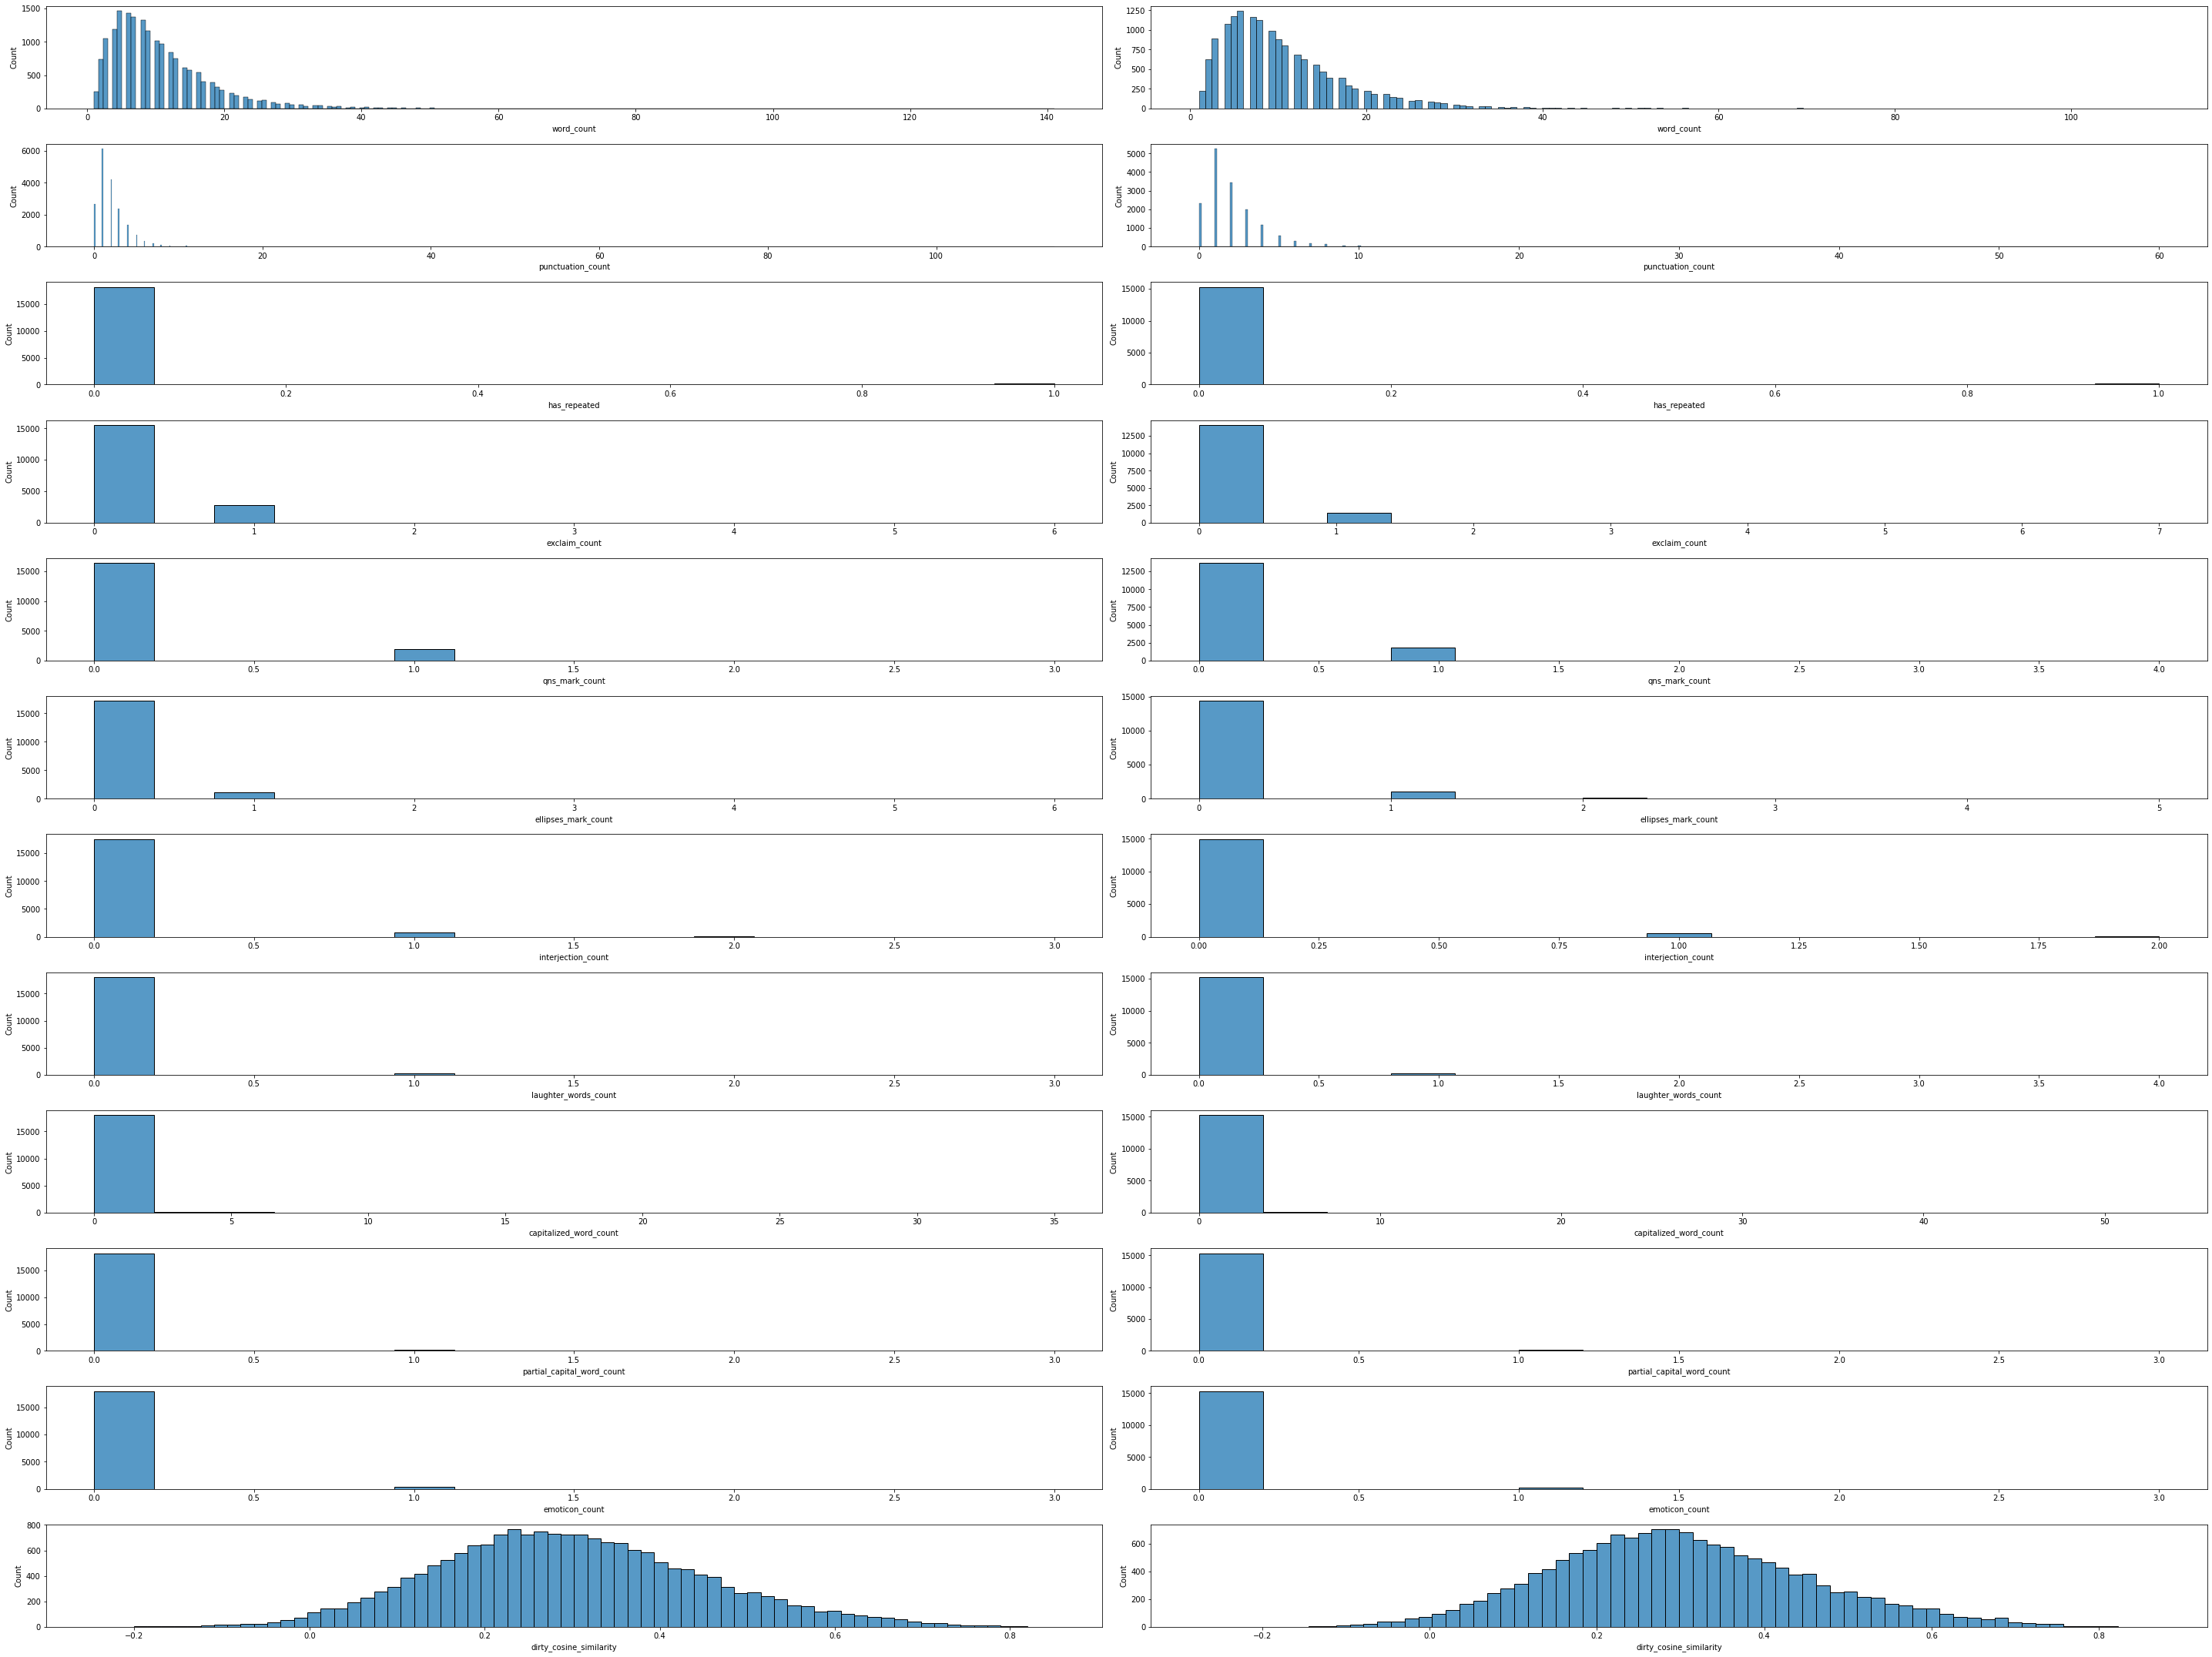

In [28]:
plt.figure(figsize=(40,30))
k=1
for i in counts:
  plt.subplot(12,2,k)
  sns.histplot(x=feature_pred_improve[i])
  
  plt.subplot(12,2,k+1)
  sns.histplot(x=feature_pred_worse[i])
  k+=2
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 100.0)]

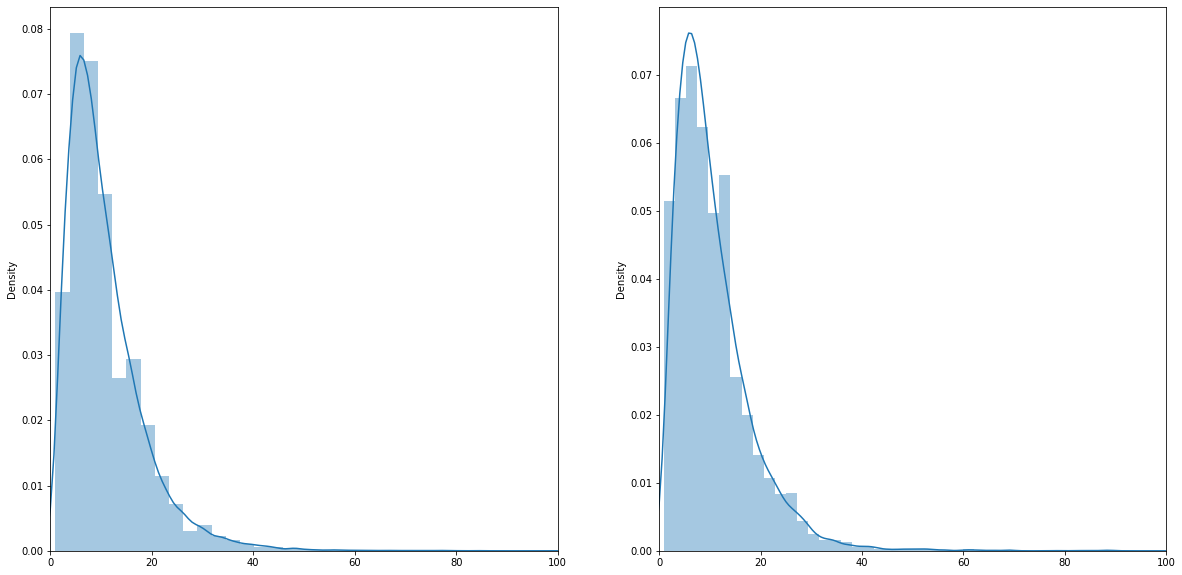

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=100)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['word_count'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['word_count'])
a.set(xlim=(0, 100))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 10.0)]

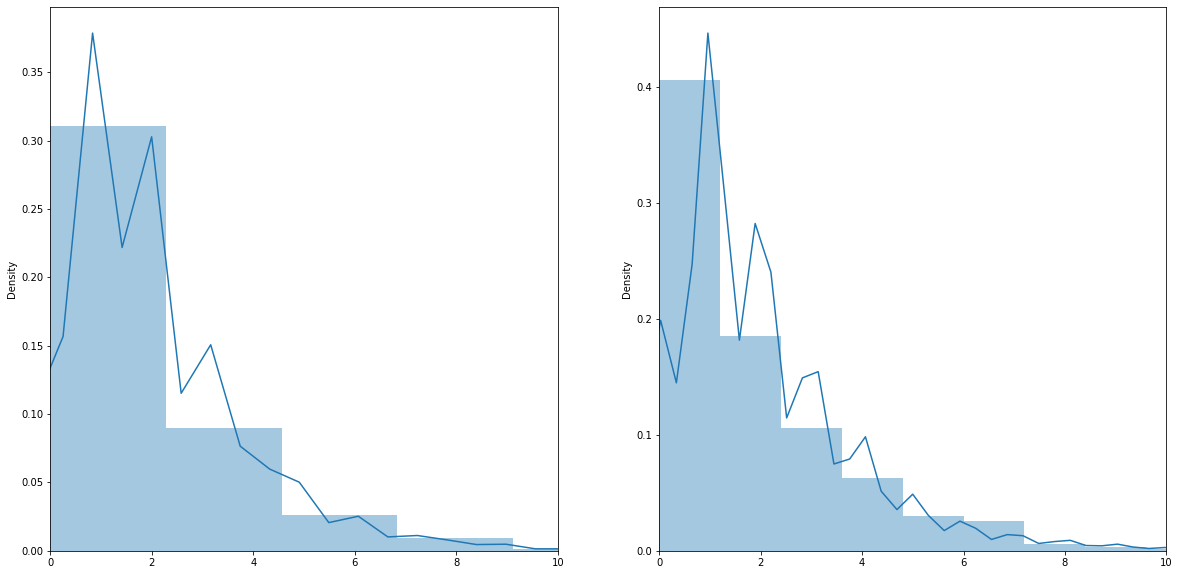

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=10)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['punctuation_count'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['punctuation_count'])
a.set(xlim=(0, 10))

For the right side, for each punctuation count, the density has more variance.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 1.0)]

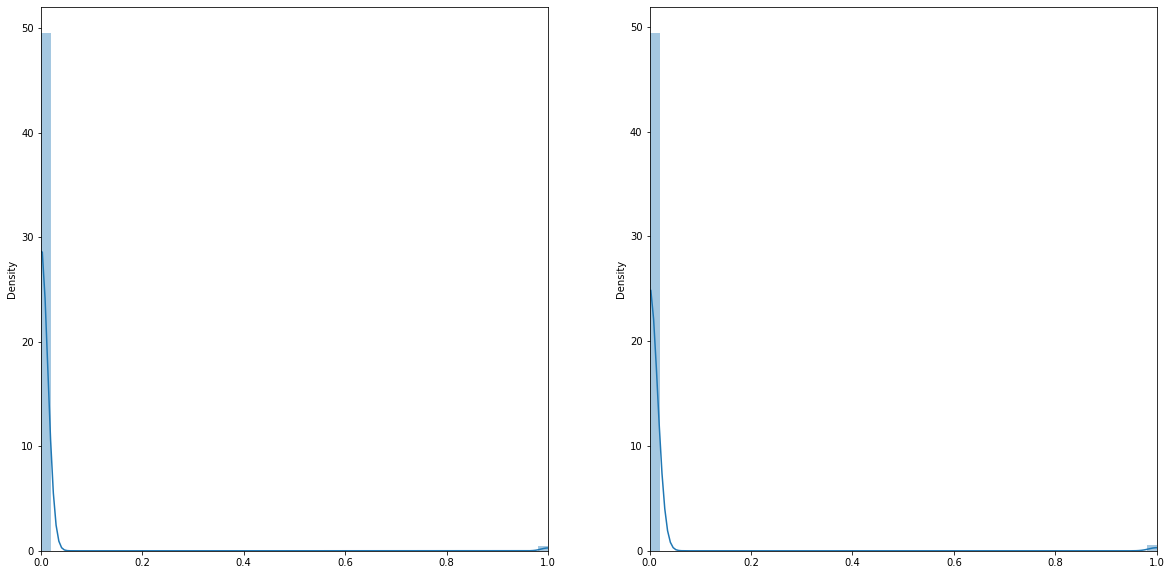

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=1)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['has_repeated'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['has_repeated'])
a.set(xlim=(0, 1))

[(0.0, 2.0)]

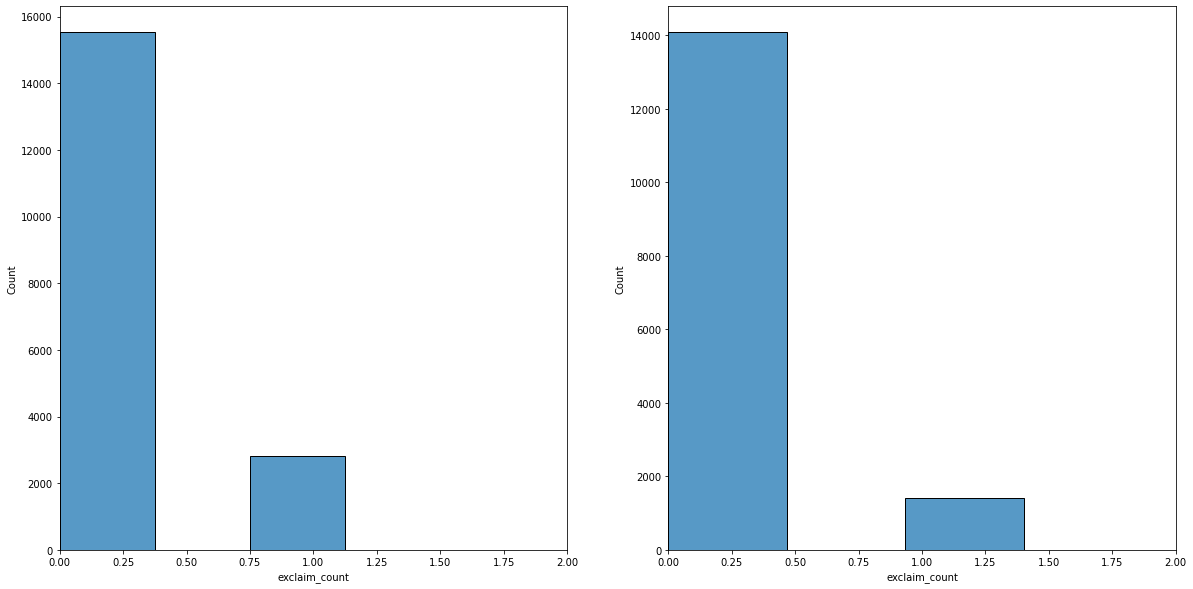

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.histplot(ax=axes[0], x=feature_pred_improve['exclaim_count'])
b = sns.histplot(ax=axes[1], x=feature_pred_worse['exclaim_count'])
a.set(xlim=(0, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 2.0)]

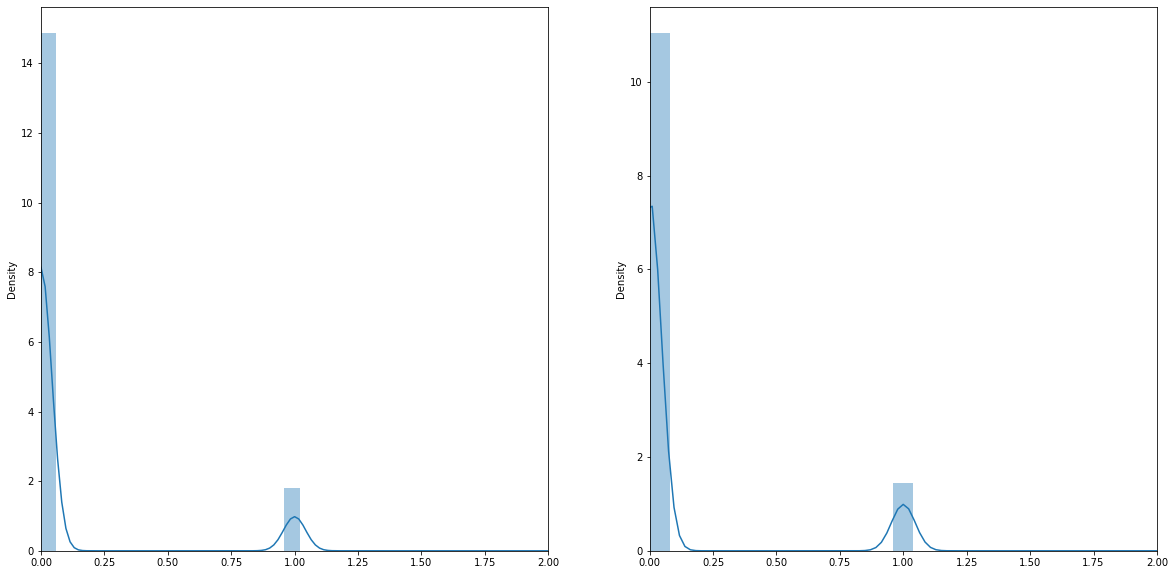

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['qns_mark_count'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['qns_mark_count'])
a.set(xlim=(0, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 4.0)]

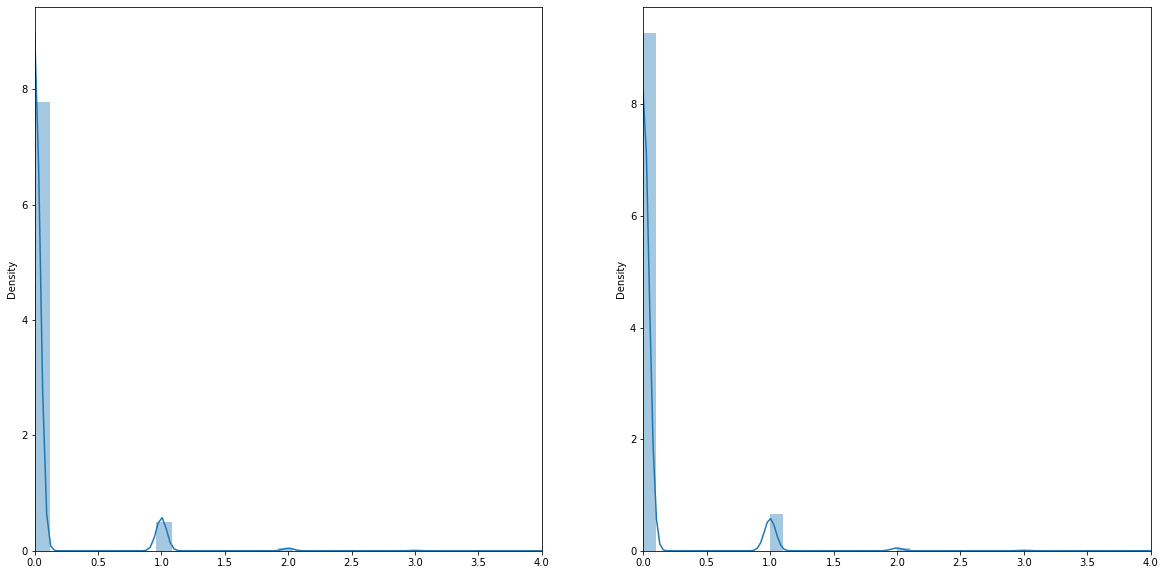

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=4)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['ellipses_mark_count'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['ellipses_mark_count'])
a.set(xlim=(0, 4))

[(0.0, 2.0)]

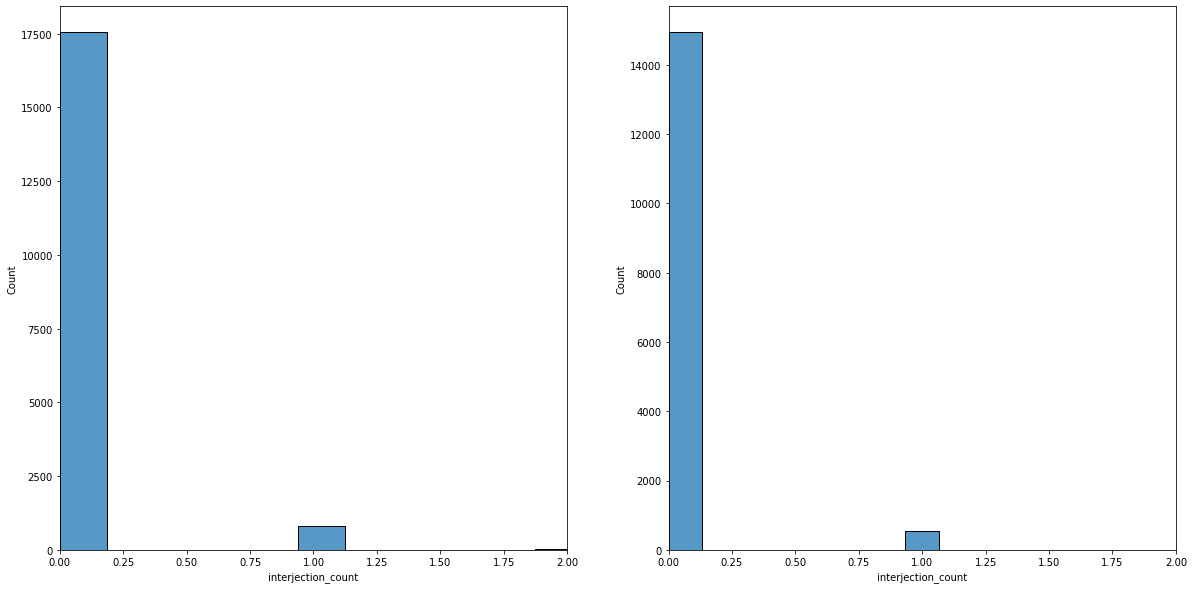

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.histplot(ax=axes[0], x=feature_pred_improve['interjection_count'])
b = sns.histplot(ax=axes[1], x=feature_pred_worse['interjection_count'])
a.set(xlim=(0, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 2.0)]

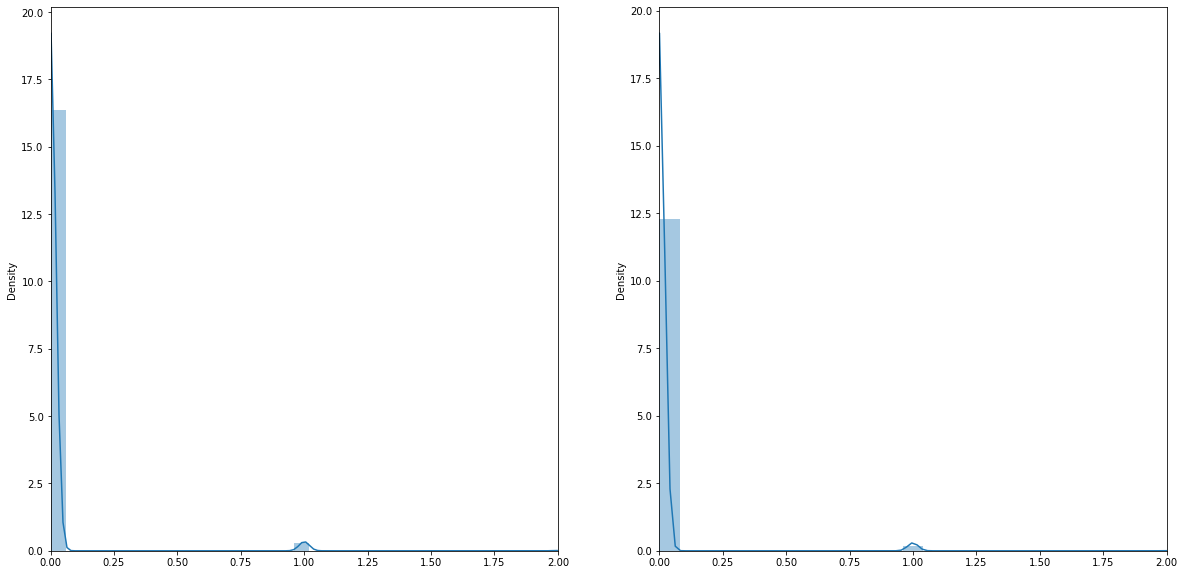

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.distplot(ax=axes[0], x=feature_pred_improve['laughter_words_count'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['laughter_words_count'])
a.set(xlim=(0, 2))

[(0.0, 25.0)]

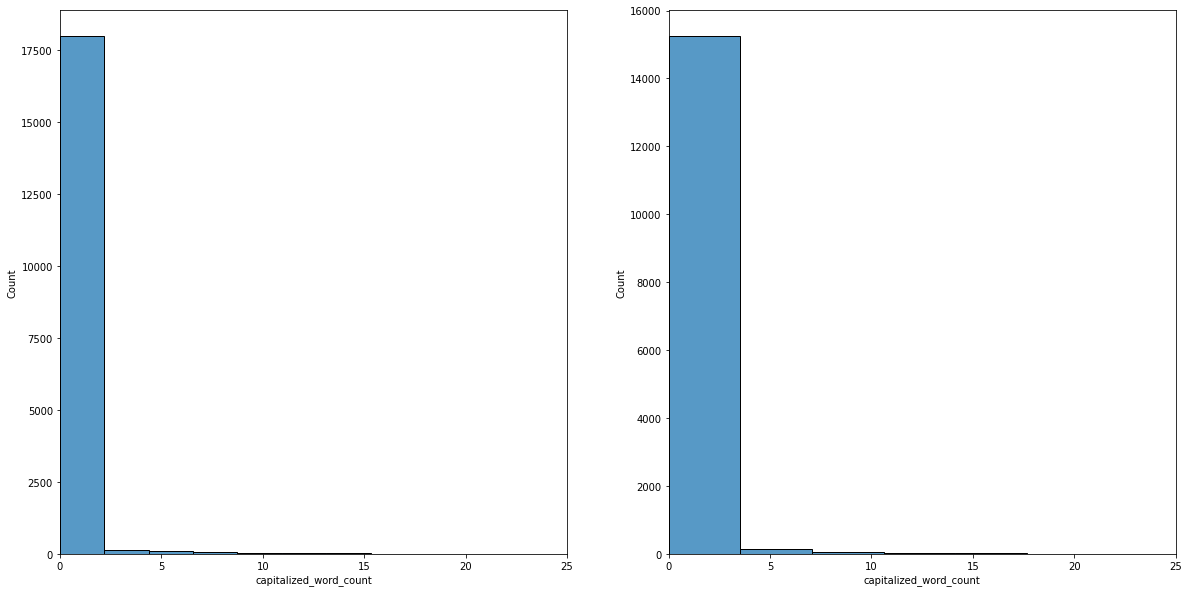

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=25)
a = sns.histplot(ax=axes[0], x=feature_pred_improve['capitalized_word_count'])
b = sns.histplot(ax=axes[1], x=feature_pred_worse['capitalized_word_count'])
a.set(xlim=(0, 25))

(0.0, 10.0)

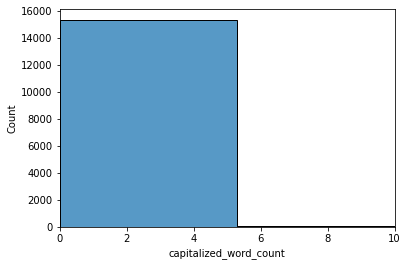

In [38]:
sns.histplot(feature_pred_worse['capitalized_word_count'],bins=10)
plt.xlim(0,10)

[(0.0, 2.0)]

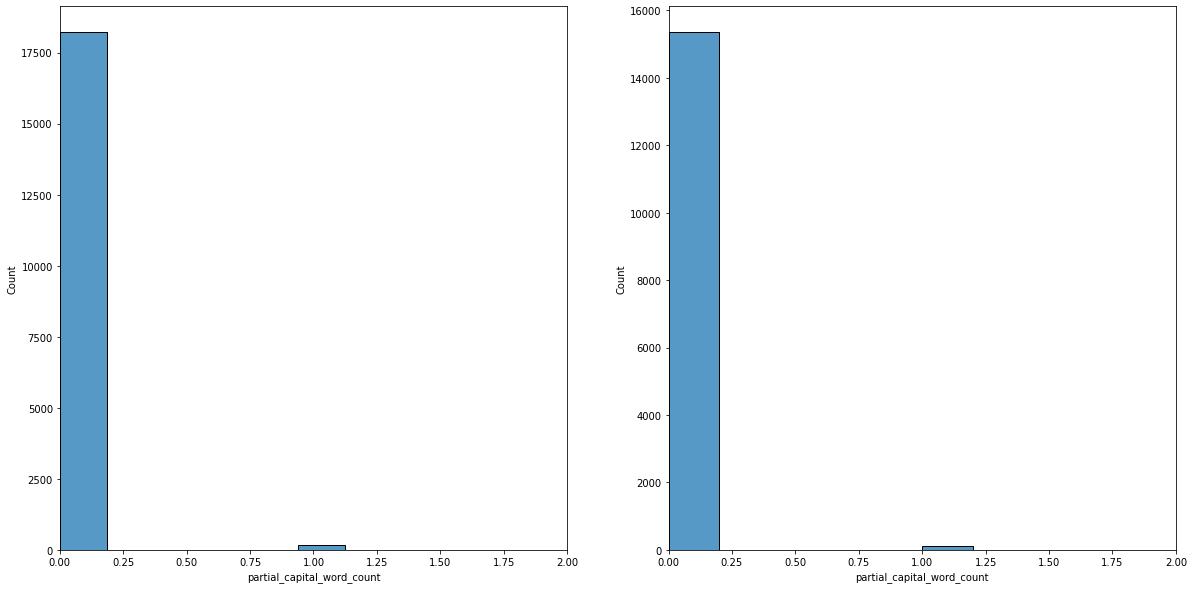

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.histplot(ax=axes[0], x=feature_pred_improve['partial_capital_word_count'])
b = sns.histplot(ax=axes[1], x=feature_pred_worse['partial_capital_word_count'])
a.set(xlim=(0, 2))

[(0.0, 2.0)]

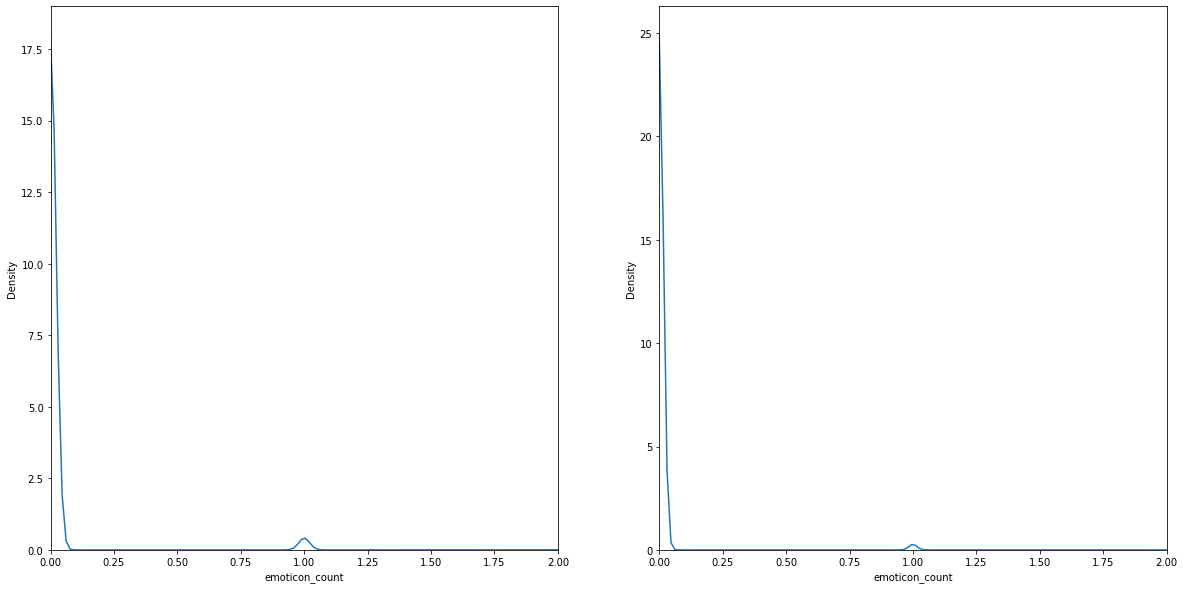

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.kdeplot(ax=axes[0], x=feature_pred_improve['emoticon_count'])
b = sns.kdeplot(ax=axes[1], x=feature_pred_worse['emoticon_count'])
a.set(xlim=(0, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


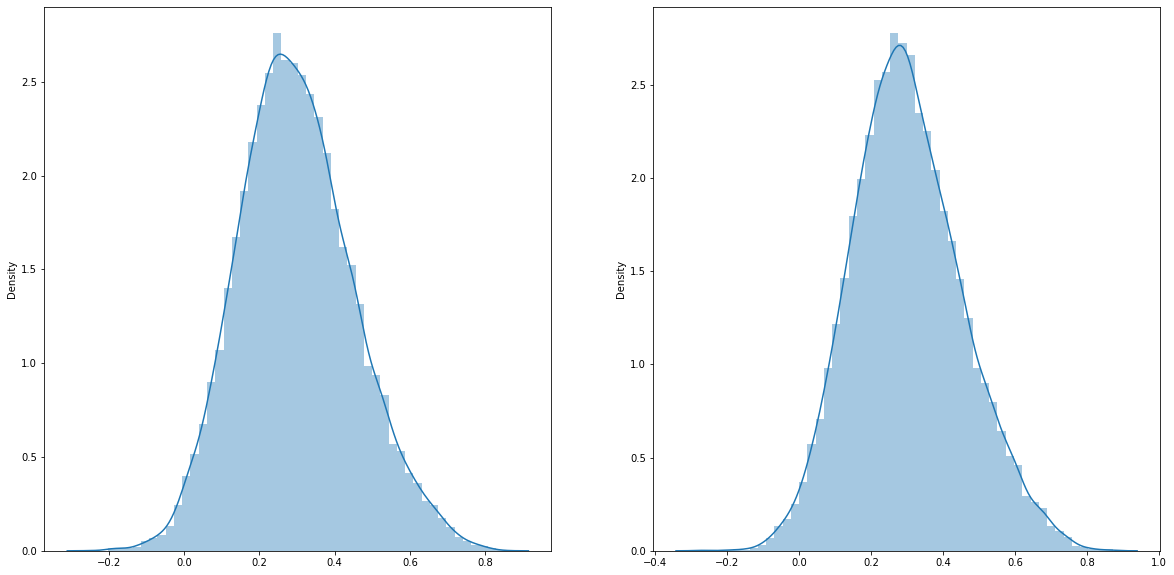

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
a = sns.distplot(ax=axes[0], x=feature_pred_improve['dirty_cosine_similarity'])
b = sns.distplot(ax=axes[1], x=feature_pred_worse['dirty_cosine_similarity'])

In [42]:
feature_pred_worse['dirty_cosine_similarity'].describe()

count    15488.000000
mean         0.301014
std          0.153089
min         -0.275491
25%          0.194623
50%          0.291126
75%          0.399671
max          0.871814
Name: dirty_cosine_similarity, dtype: float64

In [43]:
feature_pred_improve['dirty_cosine_similarity'].describe()

count    18377.000000
mean         0.298479
std          0.152151
min         -0.246124
25%          0.192657
50%          0.289359
75%          0.395683
max          0.850336
Name: dirty_cosine_similarity, dtype: float64

The left side the max cosine similarity <1, which means after using the other features for the model, the model predicts better for comments that are more different form parent comments


# From feature pred to hyper pred


In [44]:
hyper_pred_improve = test_data[(test_data['feature_pred']!=test_data['label']) & (test_data['hyper_pred']==test_data['label'])] # 11780 predicted correctly after tuning

In [46]:
hyper_pred_worse = test_data[(test_data['feature_pred']==test_data['label']) & (test_data['hyper_pred']!=test_data['label'])]  #  11397 predicted wrongly after using features

In [48]:
counts =['word_count',
       'punctuation_count', 'has_repeated', 'exclaim_count', 'qns_mark_count',
       'ellipses_mark_count', 'interjection_count', 'laughter_words_count',
       'capitalized_word_count', 'partial_capital_word_count',
       'emoticon_count','dirty_cosine_similarity']

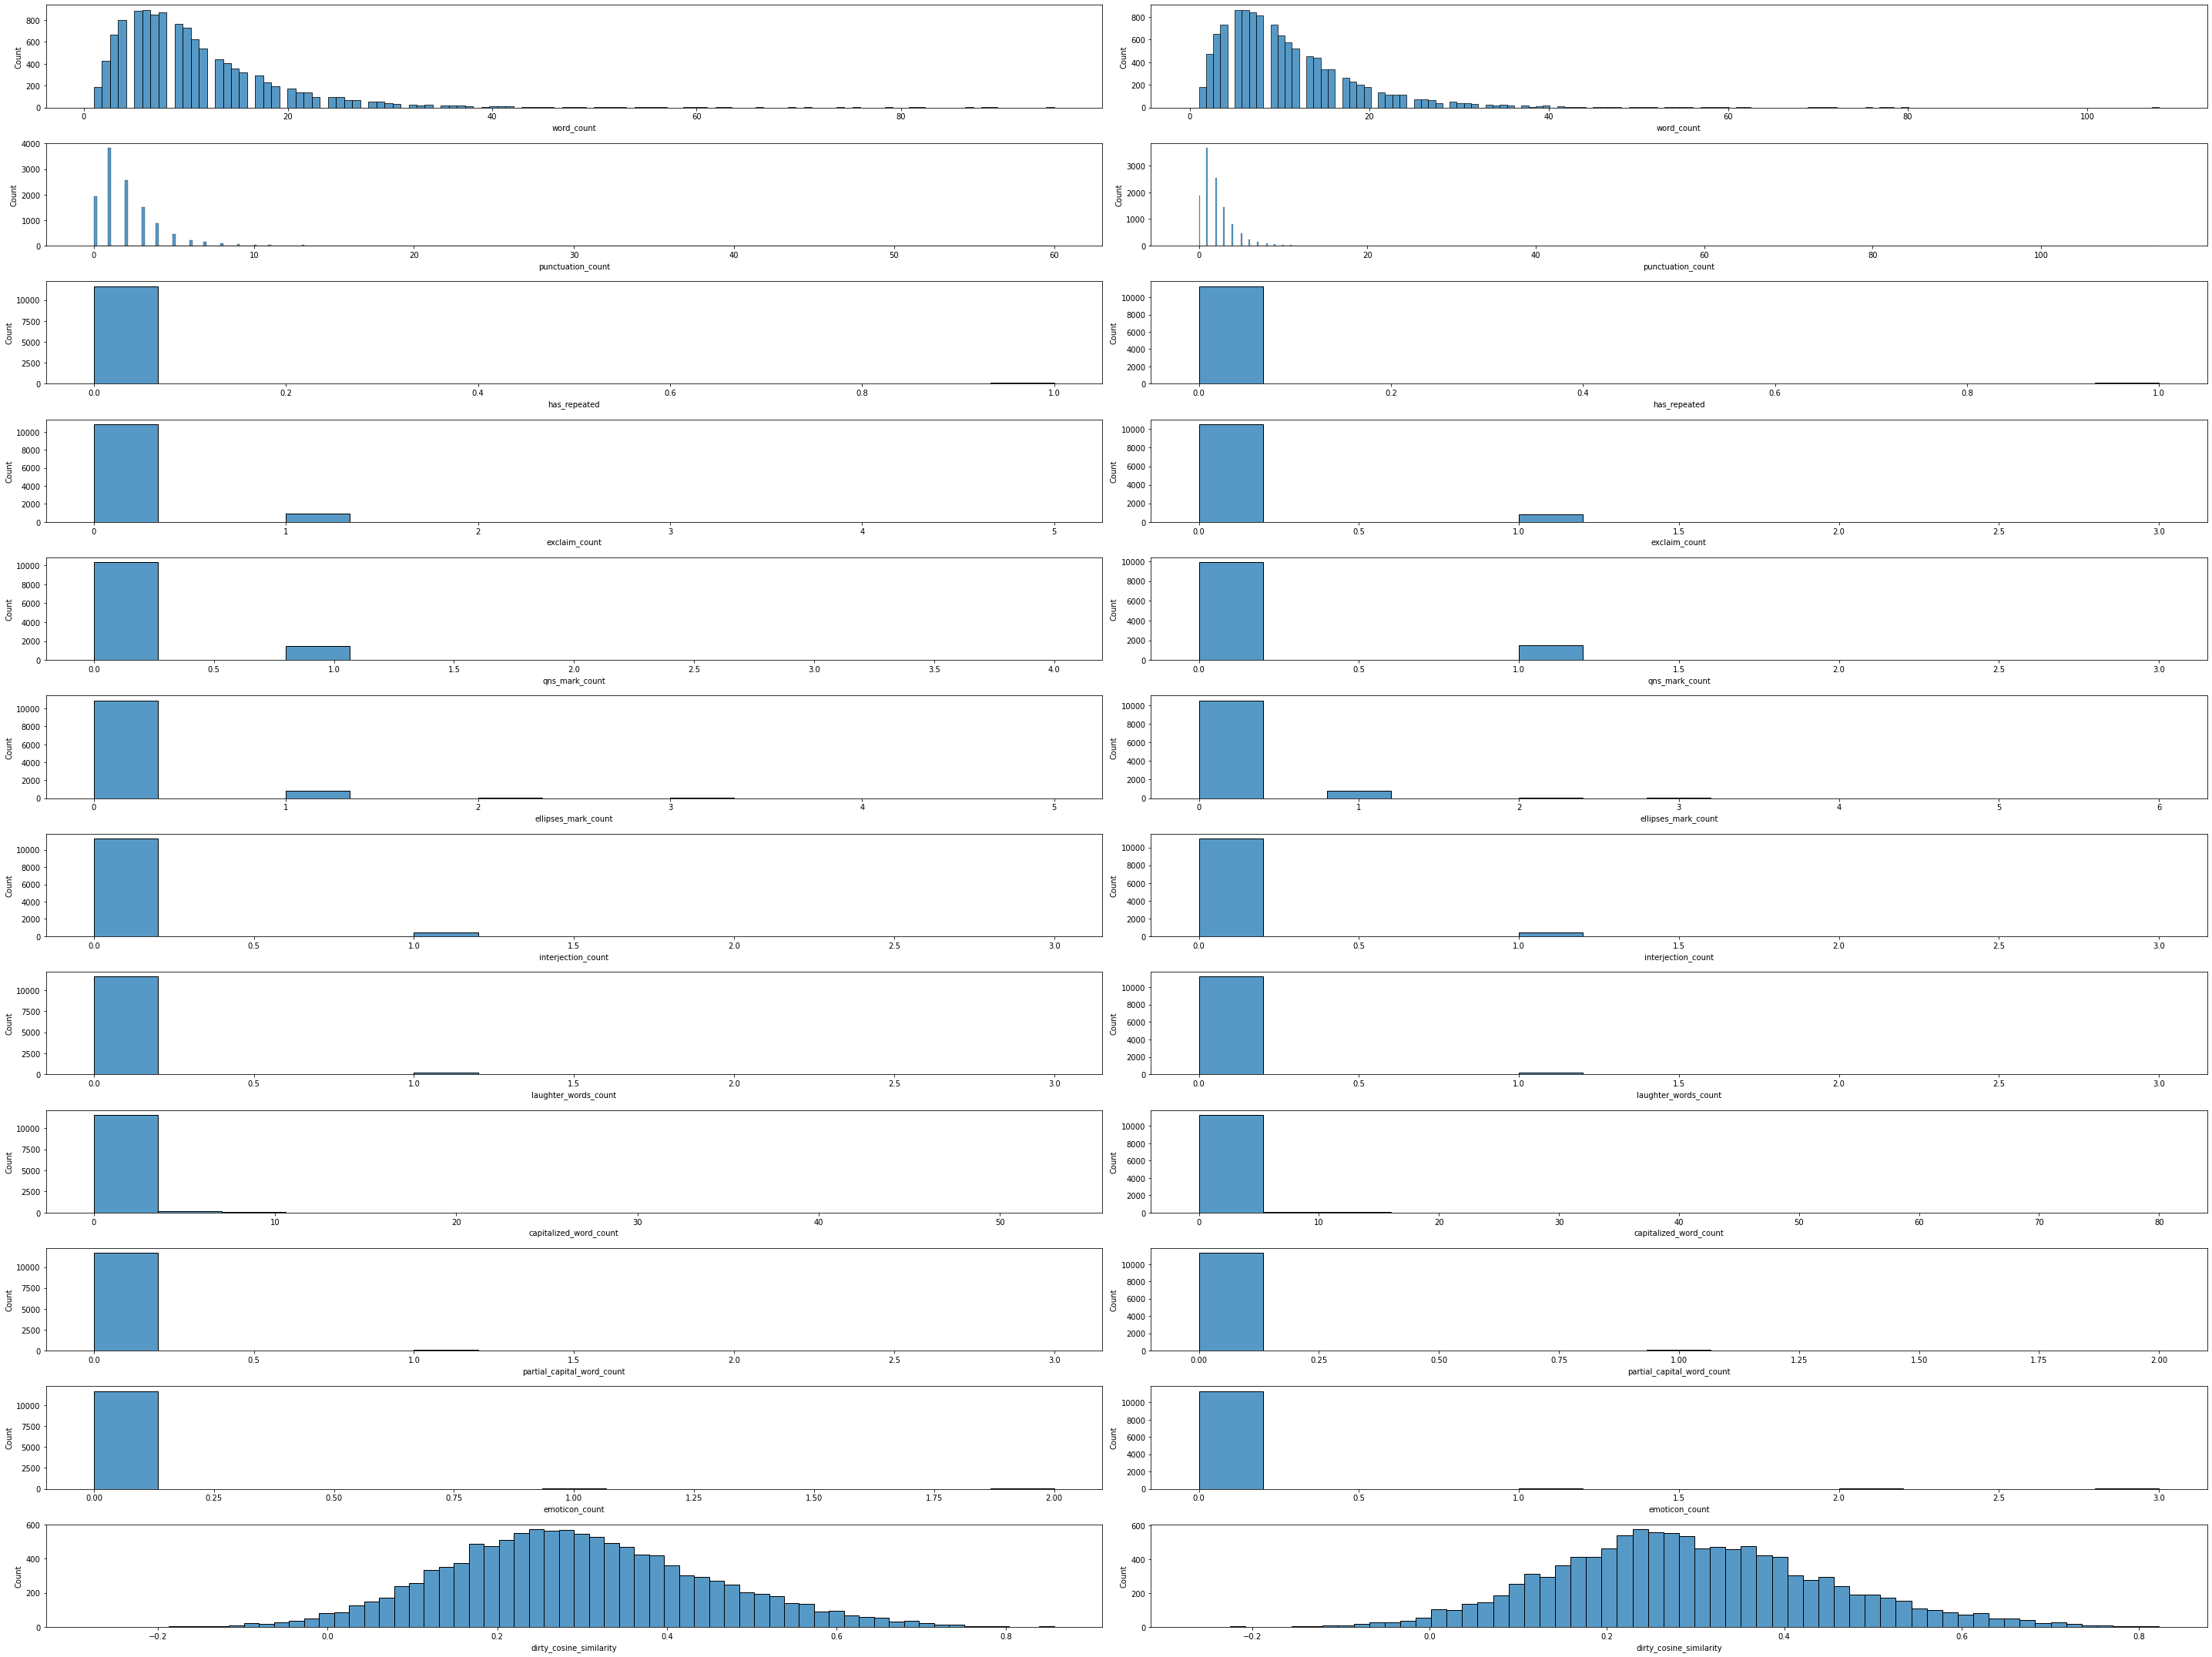

In [49]:
plt.figure(figsize=(40,30))
k=1
for i in counts:
  plt.subplot(12,2,k)
  sns.histplot(x=hyper_pred_improve[i])
  
  plt.subplot(12,2,k+1)
  sns.histplot(x=hyper_pred_worse[i])
  k+=2
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 200.0)]

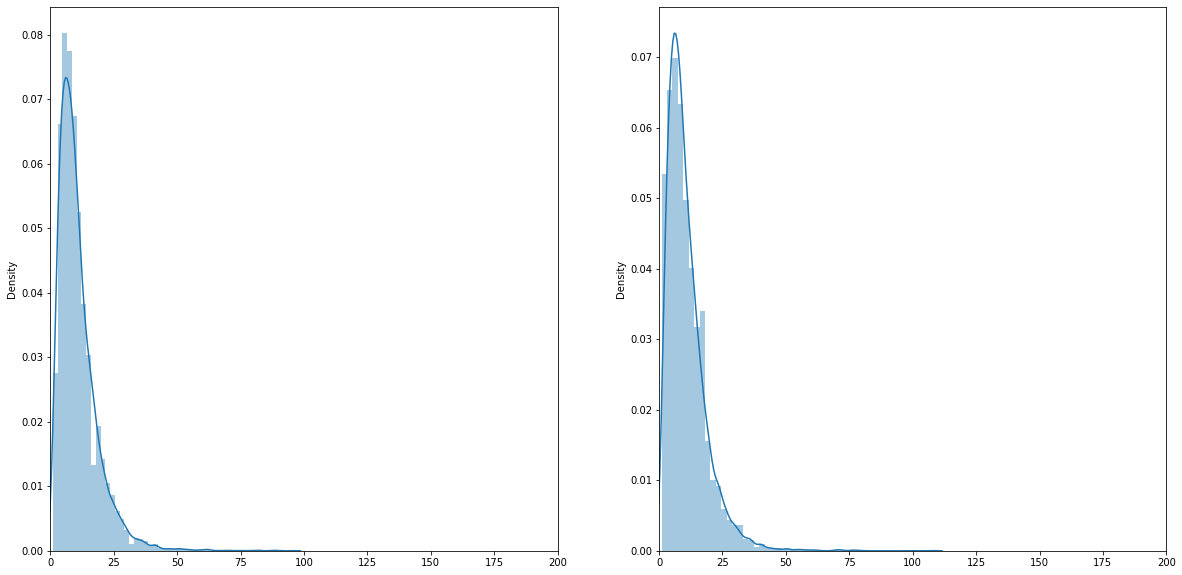

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=200)
a = sns.distplot(ax=axes[0], x=hyper_pred_improve['word_count'])
b = sns.distplot(ax=axes[1], x=hyper_pred_worse['word_count'])
a.set(xlim=(0, 200))

[(0.0, 10.0)]

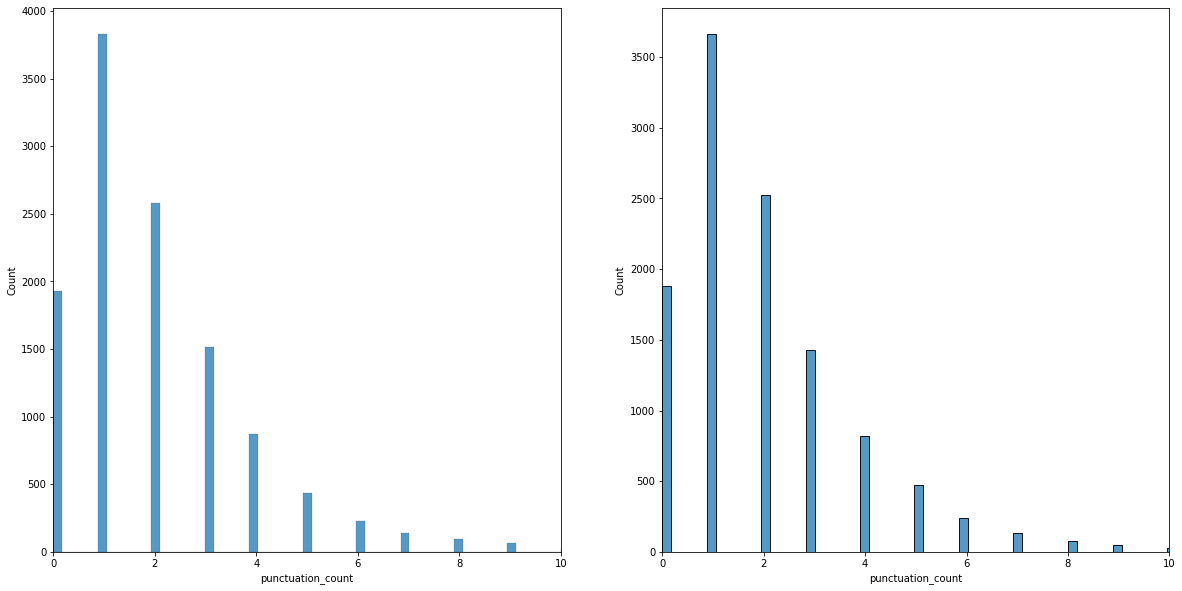

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=10)
a = sns.histplot(ax=axes[0], x=hyper_pred_improve['punctuation_count'])
b = sns.histplot(ax=axes[1], x=hyper_pred_worse['punctuation_count'])
a.set(xlim=(0, 10))

For the right side, for each punctuation count, the density has more variance.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 1.0)]

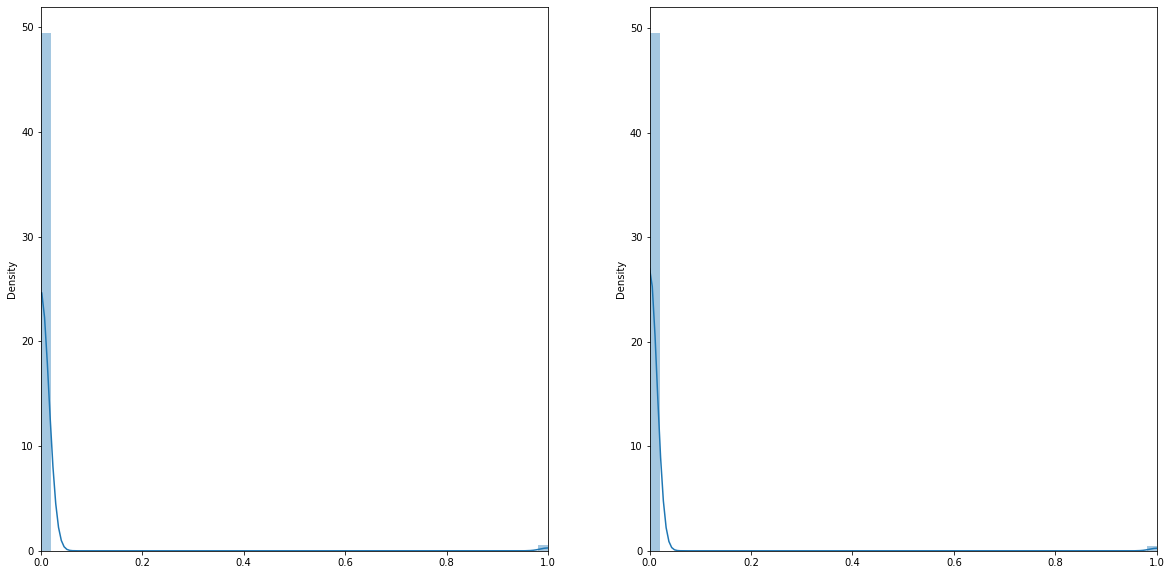

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=1)
a = sns.distplot(ax=axes[0], x=hyper_pred_improve['has_repeated'])
b = sns.distplot(ax=axes[1], x=hyper_pred_worse['has_repeated'])
a.set(xlim=(0, 1))

[(0.0, 2.0)]

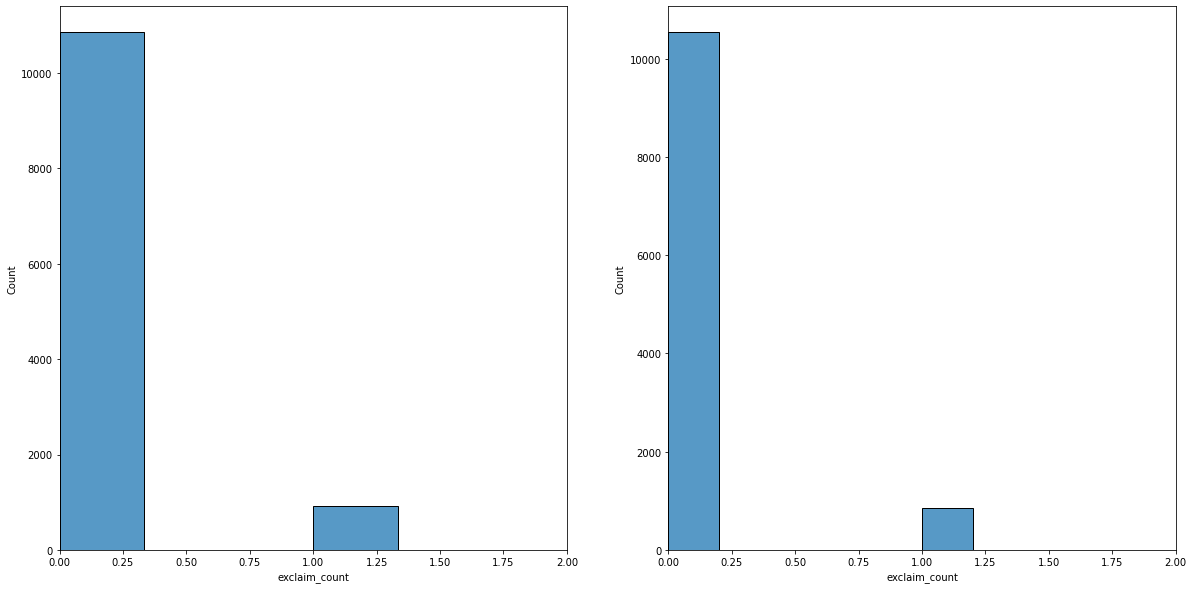

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.histplot(ax=axes[0], x=hyper_pred_improve['exclaim_count'])
b = sns.histplot(ax=axes[1], x=hyper_pred_worse['exclaim_count'])
a.set(xlim=(0, 2))

In [54]:
sum(hyper_pred_improve['exclaim_count'])

931

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 2.0)]

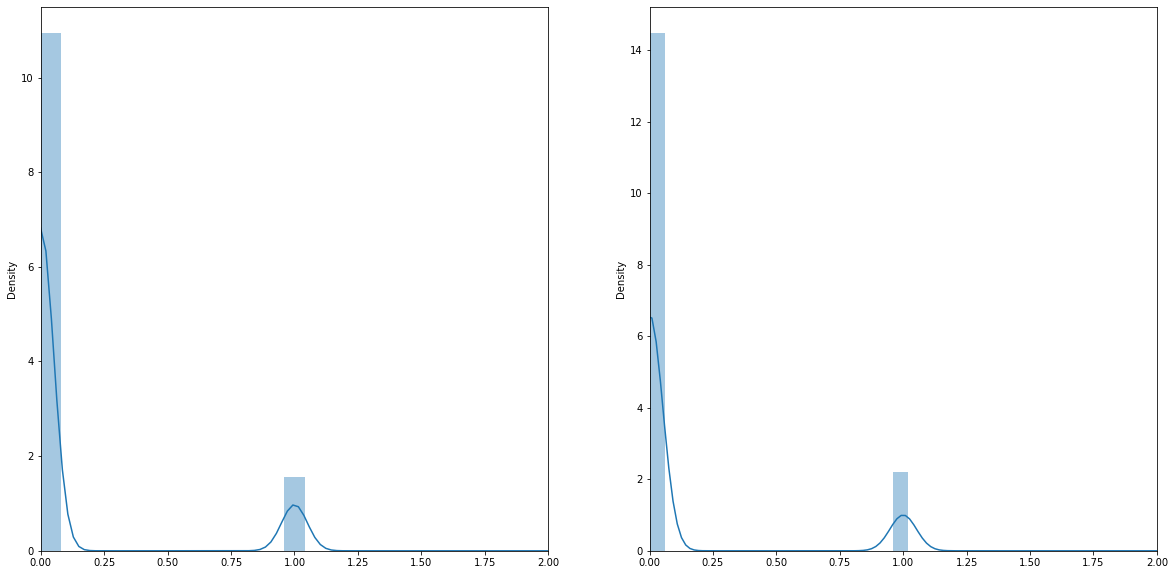

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.distplot(ax=axes[0], x=hyper_pred_improve['qns_mark_count'])
b = sns.distplot(ax=axes[1], x=hyper_pred_worse['qns_mark_count'])
a.set(xlim=(0, 2))

[(0.0, 4.0)]

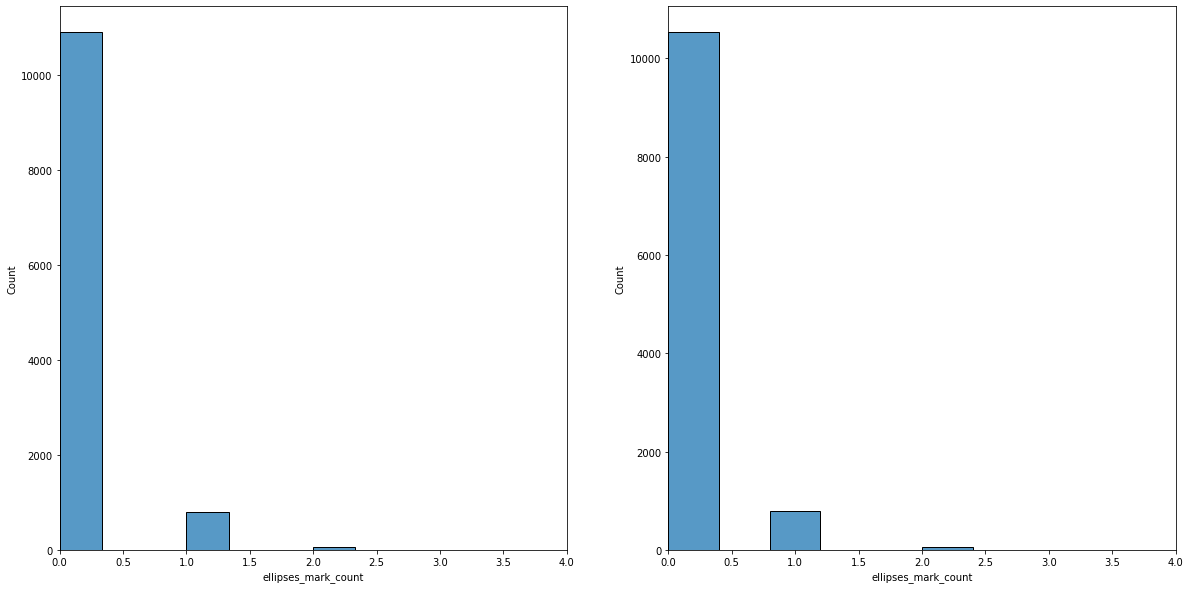

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=4)
a = sns.histplot(ax=axes[0], x=hyper_pred_improve['ellipses_mark_count'])
b = sns.histplot(ax=axes[1], x=hyper_pred_worse['ellipses_mark_count'])
a.set(xlim=(0, 4))

In [57]:
hyper_pred_improve['ellipses_mark_count'].describe()

count    11780.000000
mean         0.081579
std          0.303446
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: ellipses_mark_count, dtype: float64

[(0.0, 5.0)]

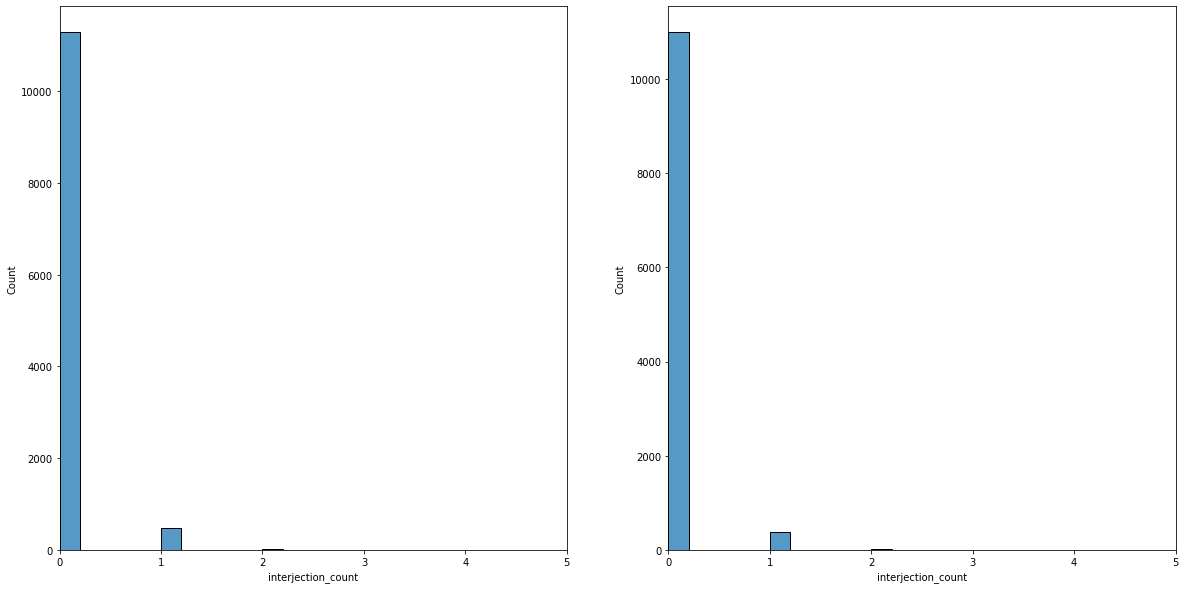

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=5)
a = sns.histplot(ax=axes[0], x=hyper_pred_improve['interjection_count'])
b = sns.histplot(ax=axes[1], x=hyper_pred_worse['interjection_count'])
a.set(xlim=(0, 5))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 2.0)]

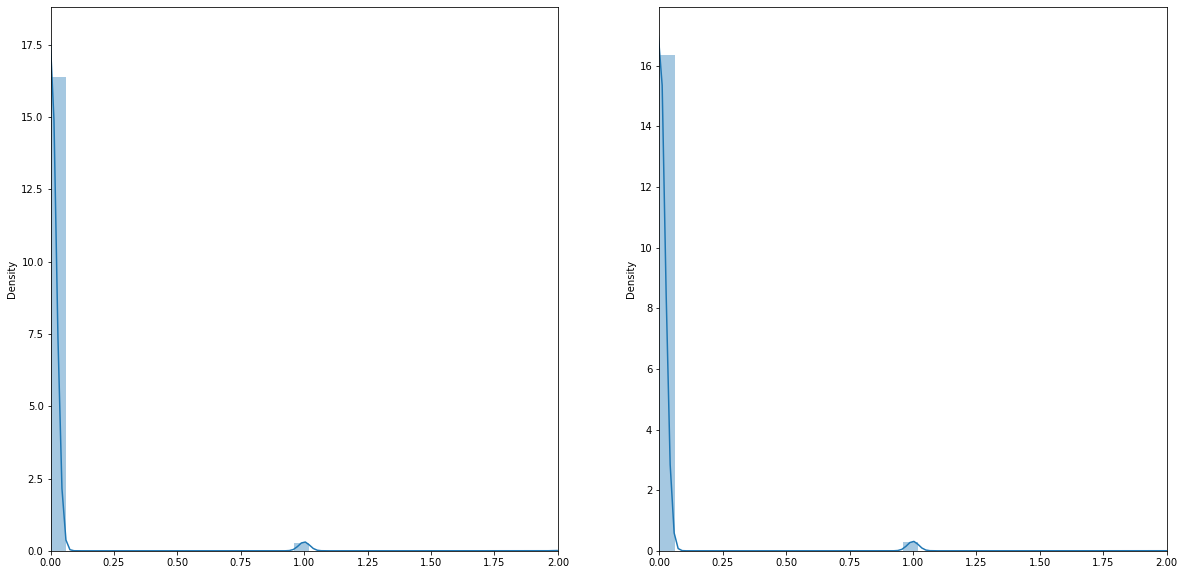

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.distplot(ax=axes[0], x=hyper_pred_improve['laughter_words_count'])
b = sns.distplot(ax=axes[1], x=hyper_pred_worse['laughter_words_count'])
a.set(xlim=(0, 2))

[(0.0, 10.0)]

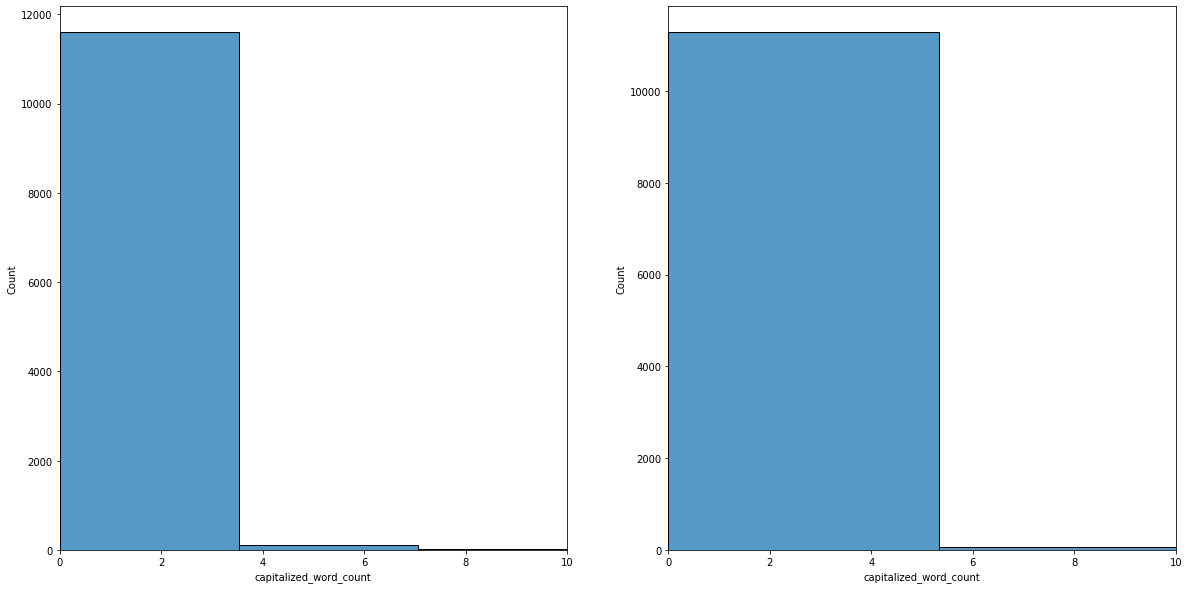

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=10)
a = sns.histplot(ax=axes[0], x=hyper_pred_improve['capitalized_word_count'])
b = sns.histplot(ax=axes[1], x=hyper_pred_worse['capitalized_word_count'])
a.set(xlim=(0, 10))

In [63]:
sum(hyper_pred_worse['capitalized_word_count']==0)

10041

In [64]:
hyper_pred_improve['capitalized_word_count'].describe()

count    11780.000000
mean         0.266553
std          1.324279
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         53.000000
Name: capitalized_word_count, dtype: float64

In [65]:
hyper_pred_worse['capitalized_word_count'].describe()

count    11397.000000
mean         0.278670
std          1.521835
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         80.000000
Name: capitalized_word_count, dtype: float64

[(0.0, 2.0)]

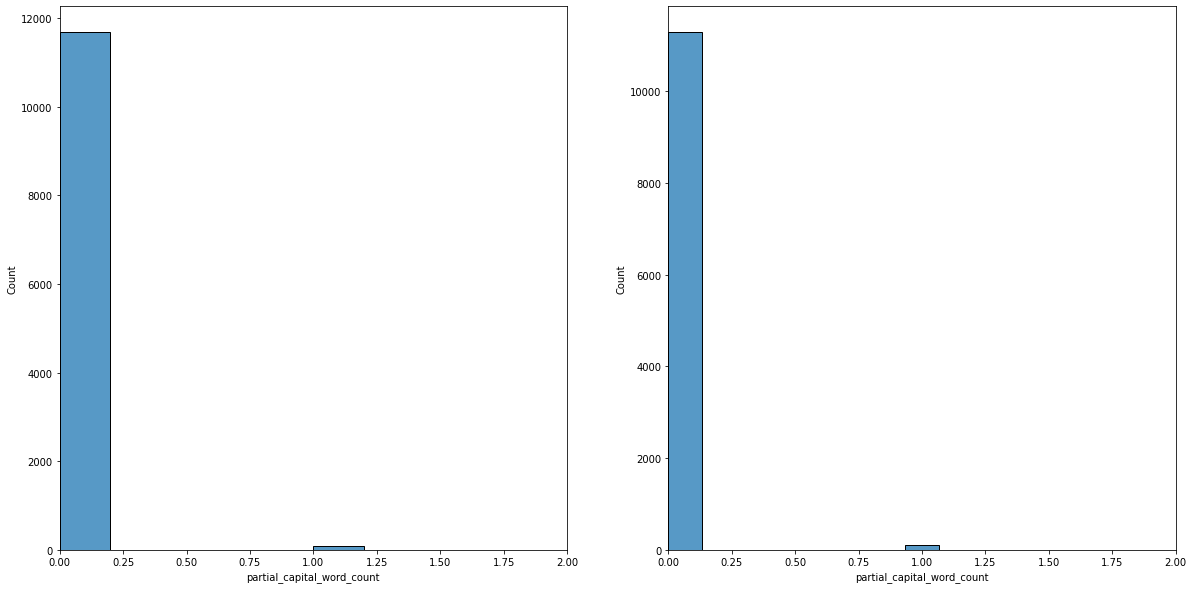

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.histplot(ax=axes[0], x=hyper_pred_improve['partial_capital_word_count'])
b = sns.histplot(ax=axes[1], x=hyper_pred_worse['partial_capital_word_count'])
a.set(xlim=(0, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 2.0)]

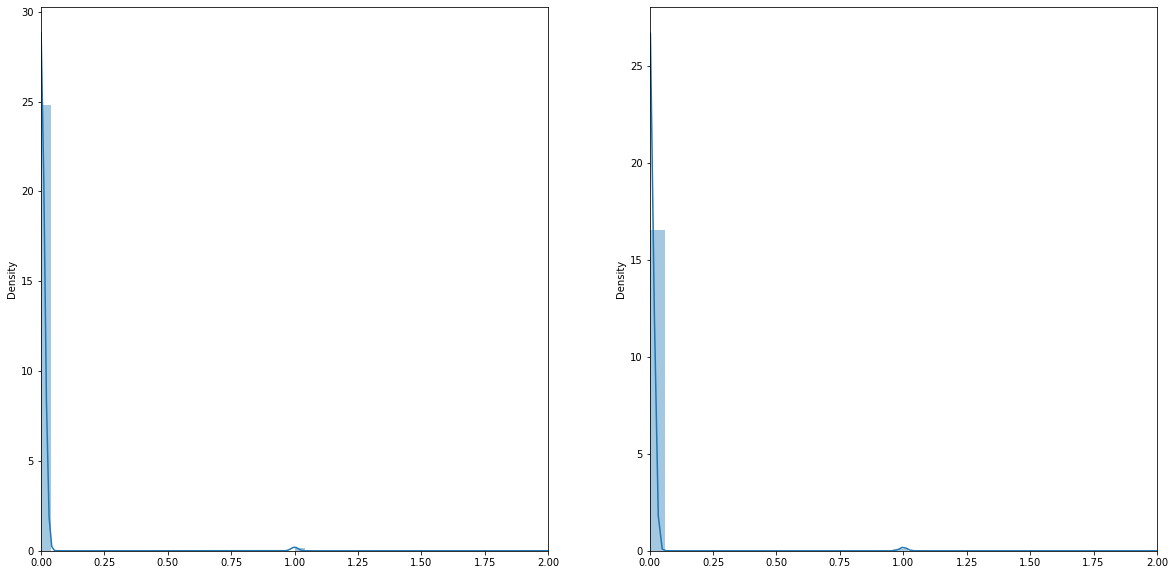

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
plt.xlim(xmin=0,xmax=2)
a = sns.distplot(ax=axes[0], x=hyper_pred_improve['emoticon_count'])
b = sns.distplot(ax=axes[1], x=hyper_pred_worse['emoticon_count'])
a.set(xlim=(0, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


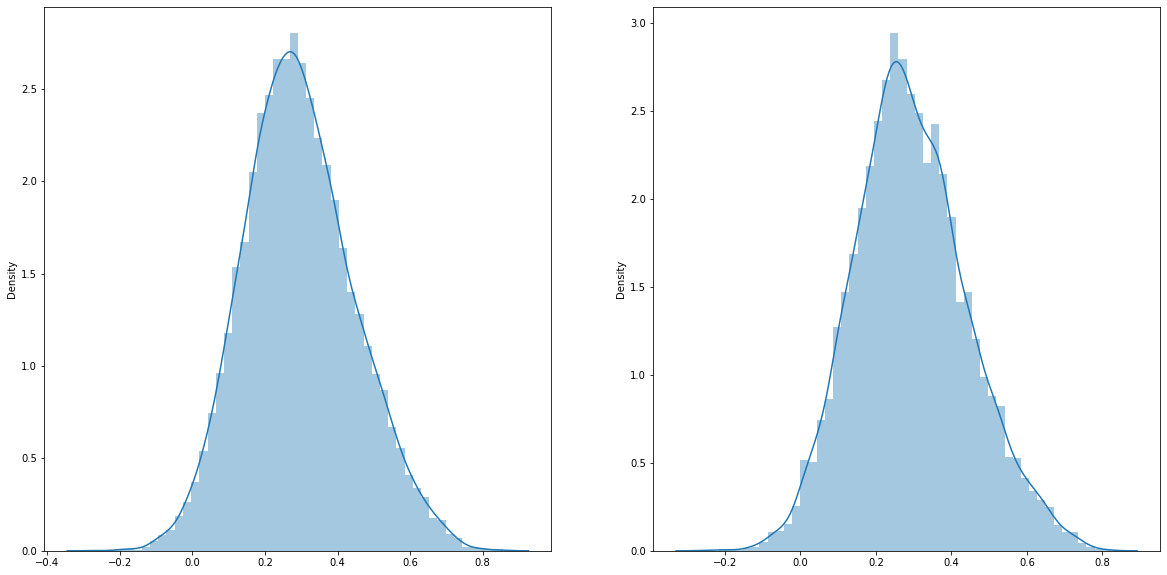

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
a = sns.distplot(ax=axes[0], x=hyper_pred_improve['dirty_cosine_similarity'])
b = sns.distplot(ax=axes[1], x=hyper_pred_worse['dirty_cosine_similarity'])

After hyperparameter tuning, the model predicts comment that are more different than parent comments better.

In [69]:
hyper_pred_worse['partial_capital_word_count'].describe()

count    11397.000000
mean         0.009564
std          0.099118
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: partial_capital_word_count, dtype: float64

In [70]:
test_data[test_data.index == 337446]

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,lemmatized_comment,lemmatized_parent_comment,clean_comment,clean_parent_comment,lemmatized_clean_comment,lemmatized_clean_parent_comment,vectorized_comment,vectorized_clean_comment,vectorized_parent_comment,vectorized_clean_parent_comment,dirty_cosine_similarity,clean_cosine_similarity,word_count,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count,partial_capital_word_count,emoticon_count,sentiment,base_pred,feature_pred,hyper_pred
337446,1,Let's just skip the Jill stein farce and elect...,bruceholder84,jillstein,1.0,1.0,0.0,2016-07,25/7/16 18:12,Why we have to rally behind Jill stein now mor...,Let 's skip Jill stein farce elect Trump !,Why rally behind Jill stein ever ( X-post Koss...,Lets just skip the Jill stein farce and elect ...,Why we have to rally behind Jill stein now mor...,Lets skip Jill stein farce elect Trump,Why rally behind Jill stein ever Xpost Kossack...,"[0.16645527, -0.08757466, -0.32650626, -0.1745...","[0.42375305, 0.06244098, -0.30821297, -0.10472...","[-2.2560093, 1.3278992, -0.6931175, -0.5429194...","[-3.0022879, 2.2299795, -1.6536287, -1.2023075...",0.103244,0.070358,10,2,0,1,0,0,0,0,0,0,0,neg,0,1,1


In [ ]:
pd.set_option('display.max_colwidth',None)
feature_pred_improve.sample(n=10)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,lemmatized_comment,lemmatized_parent_comment,clean_comment,clean_parent_comment,lemmatized_clean_comment,lemmatized_clean_parent_comment,vectorized_comment,vectorized_clean_comment,vectorized_parent_comment,vectorized_clean_parent_comment,dirty_cosine_similarity,clean_cosine_similarity,word_count,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count,partial_capital_word_count,emoticon_count,sentiment,base_pred,feature_pred,hyper_pred
442666,0,Falstad should be invulnerable in flight.,a3udi,heroesofthestorm,7.0,7.0,0.0,2016-02,27/2/16 18:18,Abathur's bombs make a nice runway,Falstad invulnerable flight .,Abathur 's bomb make nice runway,Falstad should be invulnerable in flight,Abathurs bombs make a nice runway,Falstad invulnerable flight,Abathurs bomb make nice runway,"[-0.13573527, -0.18163694, 0.4710015, 0.8370931, 0.029208185, -0.075874604, 0.1779355, -0.36235508, 0.35384697, -0.10064475, 0.38032937, -0.2699823, -0.06755435, -0.07949732, 0.46533507, 0.066900045, 0.2556598, -0.052328605, -0.087873116, -0.3002828, 0.05275116, 0.059333056, -0.05319899, 0.26727262, 0.28507167, 0.12639277, -0.36298525, 0.019337183, -0.15086797, 0.14192718, -0.18711583, 0.14611006, 0.06420435, 0.21141893, 0.29247928, 0.26133657, -0.20680311, 0.22607522, 0.022691933, 0.52666163, -0.66323936, -0.35116062, 0.24420422, -0.020255718, -0.5570569, 0.11562076, -0.48316574, 0.19259496, -0.10305375, -0.13331988, 0.38861996, -0.09429212, 0.5591862, 0.23130098, -0.028091231, 0.029943151, 0.039403055, 0.52568907, 0.23524772, -0.34950474, -0.13191277, 0.33969718, -0.2081177, -0.03729332, 0.10823523, 0.102221996, 0.4975835, 0.28918836, -0.31493804, 0.27285793, 0.23171924, -0.34539402, -0.102717236, 0.52205557, -0.44186896, 0.12304854, -0.12965807, 0.15325733, -0.20446967, 0.00856946, 0.26156718, -0.023427438, -0.35203058, -0.022188002, 0.08903934, -0.45781076, -0.022094589, 0.02228432, 0.22750841, 0.1711376, -0.19950987, 0.006847825, 0.14786395, 0.530794, -0.007849207, -0.21670121, 0.5140065, 0.0054110894, 0.21601257, 0.5909856]","[-0.037792705, -0.13939662, 0.44299763, 0.818707, -0.08346769, -0.019668063, 0.14196132, -0.44068483, 0.024113646, 0.03572954, 0.28554934, -0.032063648, -0.048774116, -0.012186028, 0.45011404, 0.09246465, 0.17654033, 0.10568871, -0.064807504, -0.40330276, -0.07944462, 0.0076045822, -0.14830077, 0.2598954, 0.22397134, 0.035152096, -0.36970213, -0.078204684, -0.018398082, 0.19418645, -0.013021461, 0.116405316, -0.23546465, 0.015104482, 0.34654382, 0.22661968, -0.21025662, 0.06405851, -0.15798537, 0.5494614, -0.56154597, -0.14316717, 0.2722025, -0.024162069, -0.42601275, 0.19700715, -0.28436545, 0.30050874, -0.12558804, -0.02899187, 0.44480017, -0.2903148, 0.46323618, 0.21124701, -0.17809893, 0.10097773, 0.059298348, 0.45490354, 0.22183953, -0.42192158, -0.19960925, 0.5447283, -0.288296, -0.012600699, 0.005878498, 0.09250904, 0.56692374, 0.4517428, -0.37666962, 0.3242623, 0.34191564, -0.16989228, -0.26670638, 0.4935363, -0.3593346, -0.124690965, -0.24845833, 0.26332292, 0.013890803, -0.033326797, 0.29450402, -0.06051958, -0.4045565, -0.05140087, 0.112802476, -0.3957816, -0.012252887, -0.01488938, 0.15077129, 0.041276433, -0.120156735, 0.28657115, 0.14710654, 0.4317578, 0.25173178, -0.29956505, 0.25305626, -0.018462636, 0.14545344, 0.4904694]","[0.13171051, 0.13853173, -0.21045937, 0.52094805, -0.13676265, -0.57816935, 0.3170467, 0.7391578, -0.1959754, -0.6839259, 0.55879146, -0.49714708, 0.09811067, -0.21355659, 0.38502306, 0.48868024, 0.15194137, -0.14643528, 0.053324714, -0.04728026, 0.34927344, 0.54104173, 0.23864841, 0.3150409, 0.50912094, -0.26062903, 0.45684543, 0.27243793, 0.4461028, -0.09538321, 0.3370954, -0.30003133, -0.27128237, -0.5040059, -0.047001187, -0.11672406, -0.48532668, -0.3529413, 0.59055966, 0.5084667, 0.3213629, 0.41582754, 0.10114371, -0.18151239, 

In [ ]:
pd.set_option('display.max_colwidth',None)
feature_pred_worse.sample(n=10)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,lemmatized_comment,lemmatized_parent_comment,clean_comment,clean_parent_comment,lemmatized_clean_comment,lemmatized_clean_parent_comment,vectorized_comment,vectorized_clean_comment,vectorized_parent_comment,vectorized_clean_parent_comment,dirty_cosine_similarity,clean_cosine_similarity,word_count,punctuation_count,has_repeated,exclaim_count,qns_mark_count,ellipses_mark_count,interjection_count,laughter_words_count,capitalized_word_count,partial_capital_word_count,emoticon_count,sentiment,base_pred,feature_pred,hyper_pred
689326,0,"if you press a button while recovering from v.attack it wont register, you have to wait till the animation is completly finished, maybe thats your problem.",Im_Heartless,bloodborne,1.0,1.0,0.0,2015-06,7/6/15 6:43,"Does this game have a rare bug where your character doesn't heal despite pressing the button? After putting about 75 hours into the game, I've finally become convinced there is a bug which causes your character to not heal sometimes despite hitting the healing button. I've experienced this actually quite a few times, but it's still very rare in general and it's totally unclear to me what causes it to happen. I finally decided it must be a bug when it happened repeatedly in the blood-starved beast fight in the Ailing Loran chalice dungeon. I know Dark Souls had a rather insidious bug which basically was the exact same thing: you'd tell your character to heal and it wouldn't happen. There used to be an absolutely hilarious video on YouTube of a guy dying to a Black Knight due to this and getting extremely mad about it, but I couldn't find it. It was a rare piece of video proof that the bug existed in Dark Souls. I assume the same bug has basically resurfaced in Bloodborne somehow. Has anyone else experienced this? It's definitely not common, but when it happens it can really fuck you over. Dark Souls also had a similar bug where a roll would incorrectly get queued up and executed like 5 seconds after you hit the button, often causing people to roll off cliffs unexpectedly.","press button recover v.attack wont register , wait till animation completly finish , maybe thats problem .","Does game rare bug character n't heal despite press button ? After put 75 hour game , I 've finally become convinced bug cause character heal sometimes despite hit heal button . I 've experience actually quite time , 's still rare general 's totally unclear cause happen . I finally decide must bug happen repeatedly blood-starved beast fight Ailing Loran chalice dungeon . I know Dark Souls rather insidious bug basically exact thing : 'd tell character heal would n't happen . There use absolutely hilarious video YouTube guy die Black Knight due get extremely mad , I could n't find . It rare piece video proof bug exist Dark Souls . I assume bug basically resurface Bloodborne somehow . Has anyone else experience ? It 's definitely common , happen really fuck . Dark Souls also similar bug roll would incorrectly get queued execute like 5 second hit button , often cause people roll cliff unexpectedly .",if you press a button while recovering from vattack it wont register you have to wait till the animation is completly finished maybe thats your problem,Does this game have a rare bug where your character doesnt heal despite pressing the button After putting about 75 hours into the game Ive finally become convinced there is a bug which causes your character to not heal sometimes despite hitting the healing button Ive experienced this actually quite a few times but its still very rare in general and its totally unclear to me what causes it to happen I finally decided it must be a bug when it happened repeatedly in the bloodstarved beast fight in the Ailing Loran chalice dungeon I know Dark Souls had a rather insidious bug which basically was the exact same thing youd tell your character to heal and it wouldnt happen There used to be an absolutely